## Python: Praca domowa 1 - Monika Kucal

## Zadanie 1 - Python

In [552]:
from numpy import random

###### a) Tworzenie 10 elementowej listy z parami losowych liczb naturalnych od 1 do 10

In [564]:
lista = []
for i in range(1,11):
    lista.append((random.randint(1,11),random.randint(1,11)))

print(lista)

[(5, 1), (9, 5), (3, 7), (1, 1), (7, 1), (3, 1), (6, 3), (3, 5), (1, 3), (6, 6)]


###### b) Funkcja tworząca listę output z wynikami potęgowania dwóch liczb z listy input

In [567]:
def potegowanie(input):
    output = []
    i = 0
    while i < len(input):
        x = input[i][0]
        y = input[i][1]
        z = x ** y
        output.append(z)
        i = i + 1
        
    print(output)
        
potegowanie(lista)

[5, 59049, 2187, 1, 7, 3, 216, 243, 1, 46656]


## Zadanie 2 - Pandas

In [571]:
import pandas as pd

###### a) Tworzenie data frame z utworzonej wcześniej listy

In [572]:
df = pd.DataFrame(lista,columns=['x','y'])
df

,x,y
0,5,1
1,9,5
2,3,7
3,1,1
4,7,1
5,3,1
6,6,3
7,3,5
8,1,3
9,6,6


###### b) Dodanie trzeciej kolumny do df jako wynik potęgowania

In [573]:
df1 = pd.DataFrame(df['x']**df['y'],columns=['x^y'])
df2 = pd.concat([df,df1],axis=1)

df2

,x,y,x^y
0,5,1,5
1,9,5,59049
2,3,7,2187
3,1,1,1
4,7,1,7
5,3,1,3
6,6,3,216
7,3,5,243
8,1,3,1
9,6,6,46656


## Zadanie 3 - Klasyfikacja - Drzewo decyzyjne

###### a) Import i przygotowanie danych

In [574]:
wine = pd.read_csv('wine.data', index_col=False, names=['Label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])

In [575]:
wine.head()

,Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [576]:
X = wine.iloc[:,1:14]
y = wine["Label"]

###### b) Przegląd danych

In [577]:
X.head()
# 13 zmiennych

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [578]:
X.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [579]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [580]:
y.unique() 
# 3 klasy: 1, 2, 3

array([1, 2, 3], dtype=int64)

###### c) Podział danych na próbę uczącą 80% i testową 20%

In [581]:
from sklearn.model_selection import train_test_split

In [582]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

###### d) Klasyfikacyjne drzewo decyzyjne - próba ucząca

In [583]:
from sklearn.tree import DecisionTreeClassifier

In [584]:
from sklearn.model_selection import cross_val_score # aby zastosować cross validation
from sklearn.model_selection import StratifiedKFold # aby dokonać podziału na części do cross validation

In [613]:
best_score = 0 # do przechowywania accuracy w kolejnych iteracjach
parameters = {} # do przechowywania parametrów modelu w kolejnych iteracjach

In [614]:
skf = StratifiedKFold(n_splits = 5, random_state = 42) # podział na 5 części do cross validation

In [615]:
# Uczenie modelu - na różnych kombinacjach hiperparametrów - wybór najlepszego drzewa na podstawie Accuracy
for criterion in ["gini", "entropy"]:
    for min_split in range(2,21):
        for min_leaf in range(1,21):
            for depth in range (1,11):
                classifier = DecisionTreeClassifier(max_depth = depth, min_samples_split = min_split, 
                                             min_samples_leaf = min_leaf, criterion = criterion)
                scores = cross_val_score(classifier, X_train, y_train, cv = skf)
                # Cross_val_score function uses Accuracy from DTC algoritm (Returns the mean accuracy on the given test data and labels.)
                if scores.mean() > best_score:
                    parameters["best_depth"] = depth
                    parameters["best_min_split"] = min_split
                    parameters["best_min_leaf"] = min_leaf
                    parameters["best_criterion"] = criterion
                    best_score = scores.mean()
                    print("Accuracy: {} (std {})".format(scores.mean(), scores.std()))
                    print("max_depth: {}, min_samples_split: {}, min_samples_leaf: {}, criterion: {}".format(depth, 
                                                                                                             min_split, 
                                                                                                             min_leaf, 
                                                                                                             criterion))

Accuracy: 0.6199507389162562 (std 0.03861264619165604)
max_depth: 1, min_samples_split: 2, min_samples_leaf: 1, criterion: gini
Accuracy: 0.8731527093596059 (std 0.017727147010292238)
max_depth: 2, min_samples_split: 2, min_samples_leaf: 1, criterion: gini
Accuracy: 0.9224137931034484 (std 0.014819319168956948)
max_depth: 3, min_samples_split: 2, min_samples_leaf: 1, criterion: gini
Accuracy: 0.9288177339901479 (std 0.050683886174943786)
max_depth: 7, min_samples_split: 2, min_samples_leaf: 2, criterion: entropy
Accuracy: 0.929064039408867 (std 0.0505172353747898)
max_depth: 9, min_samples_split: 3, min_samples_leaf: 2, criterion: entropy
Accuracy: 0.9362068965517242 (std 0.05708974939969465)
max_depth: 10, min_samples_split: 5, min_samples_leaf: 5, criterion: entropy


###### e) Wybór najlepszego drzewa decyzyjnego

In [616]:
best_tree = DecisionTreeClassifier(criterion = parameters["best_criterion"], 
                                   max_depth = parameters["best_depth"], 
                                   min_samples_split = parameters["best_min_split"], 
                                   min_samples_leaf = parameters["best_min_leaf"])

In [617]:
best_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [618]:
# parametry najlepszego drzewa: 
# criterion='entropy', max_depth=10, min_samples_leaf=5, min_samples_split=5

In [619]:
# Przeliczenie modelu na parametrach
best_tree.fit(X = X_train, y = y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

###### f) Wizualizacja drzewa decyzyjnego

In [620]:
from sklearn import tree
import graphviz 

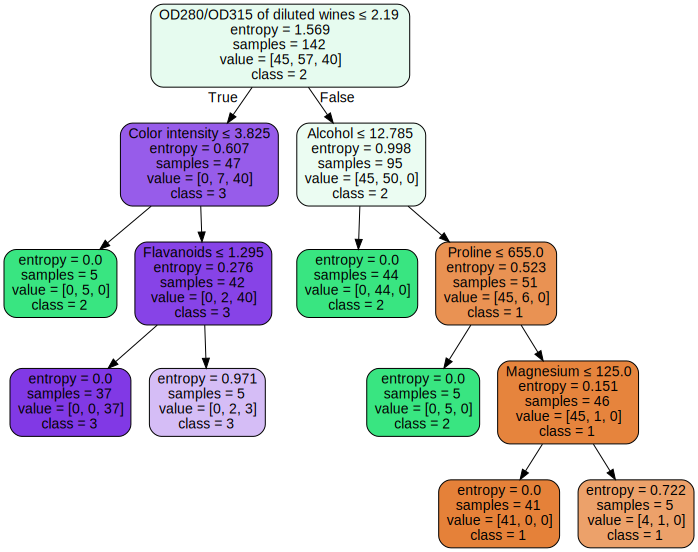

In [621]:
dot_data = tree.export_graphviz(best_tree, out_file = None, 
                                feature_names = X.columns.values, 
                                class_names = ['1','2','3'], filled = True, 
                                rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)  
graph

###### g) Klasyfikacyjne drzewo decyzyjne - próba testowa

In [622]:
prediction_tree = best_tree.predict(X_test)

In [623]:
results = pd.DataFrame({"y_true":y_test, "y_pred":prediction_tree})

In [624]:
results.head()

,y_pred,y_true
19,1,1
45,1,1
140,2,3
30,1,1
67,2,2


In [625]:
print(results["y_true"].value_counts())
print(results["y_pred"].value_counts())
# Interpretacja:
# W próbie testowej znajdowało się 14 gatunków win typu 1, 14 - typu 2 i 8 - typu 3.
# Drzewo decyzyjne w próbie testowej "znalazło" 15 gatunków win typu 1, 15 - typu 2 i 6 - typu 3.

2    14
1    14
3     8
Name: y_true, dtype: int64
2    15
1    15
3     6
Name: y_pred, dtype: int64


###### h) Confusion matrix - próba testowa

In [626]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [627]:
cm_tree = confusion_matrix(y_true = results["y_true"], y_pred = results["y_pred"])
cm_tree

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 1,  1,  6]], dtype=int64)

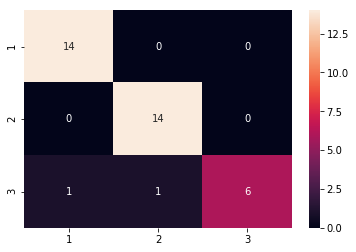

In [628]:
sns.heatmap(cm_tree, annot = True, fmt="d", xticklabels=['1','2','3'], yticklabels=['1','2','3'])
# Interpretacja:
# 14 spośród 14 gatunków win typu 1 zostało dobrze zaklasyfikowanych.
# 14 spośród 14 gatunków win typu 2 zostało dobrze zaklasyfikowanych.
# 6 spośród 8 gatunków win typu 3 zostało dobrze zaklasyfikowanych.
# 2 gatunki wina typu 3 zostały błędnie zaklasyfikowano jako typ 1 lub typ 2.

###### i) Accuracy - próba testowa

In [629]:
from sklearn.metrics import accuracy_score

In [630]:
accuracy_score(y_true = results["y_true"], y_pred = results["y_pred"])
# Interpretacja:
# 94.4% gatunków win zostało prawidłowo zaklasyfikowanych (34 spośród 36 testowanych)

0.9444444444444444

## Zadanie 4 - Regresja - Drzewo decyzyjne

###### a) Import i przygotowanie danych

In [631]:
wine_white = pd.read_csv('winequality-white.csv', index_col=False, sep=';')

In [632]:
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [633]:
X2 = wine_white.iloc[:,0:11]
y2 = wine_white["quality"]

###### b) Przegląd danych

In [634]:
X2.head()
# 11 zmiennych

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [635]:
X2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


In [636]:
y2.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [637]:
y2.unique()
# score od 0 do 10, ale w danych są wartości od 3 do 9

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

###### c) Podział danych na próbę uczącą 80% i testową 20%

In [638]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

###### d) Regresyjne drzewo decyzyjne - próba ucząca

In [639]:
from sklearn.tree import DecisionTreeRegressor

In [640]:
best_score2 = 0 # do przechowywania accuracy w kolejnych iteracjach
parameters2 = {} # do przechowywania parametrów modelu w kolejnych iteracjach

In [641]:
# Uczenie modelu - na różnych kombinacjach hiperparametrów - wybór najlepszego drzewa na podstawie R2
for criterion in ["mse"]:
    for min_split in range(2,21):
        for min_leaf in range(1,21):
            for depth in range (5,11):
                regressor = DecisionTreeRegressor(max_depth = depth, min_samples_split = min_split, 
                                             min_samples_leaf = min_leaf, criterion = criterion)
                scores = cross_val_score(regressor, X2_train, y2_train, cv = skf)
                # Cross_val_score function uses R^2 score from DTR algoritm (Returns the coefficient of determination R^2 of the prediction.)
                if scores.mean() < 0:
                    pass
                elif scores.mean() > best_score2:
                    parameters2["best_depth"] = depth
                    parameters2["best_min_split"] = min_split
                    parameters2["best_min_leaf"] = min_leaf
                    parameters2["best_criterion"] = criterion
                    best_score2 = scores.mean()
                    print("R2: {} (std {})".format(scores.mean(), scores.std()))
                    print("max_depth: {}, min_samples_split: {}, min_samples_leaf: {}, criterion: {}".format(depth, 
                                                                                                             min_split, 
                                                                                                             min_leaf, 
                                                                                                             criterion))

R2: 0.28699225878027057 (std 0.018040617135548855)
max_depth: 5, min_samples_split: 2, min_samples_leaf: 1, criterion: mse
R2: 0.2932868695052512 (std 0.015109989676353856)
max_depth: 6, min_samples_split: 2, min_samples_leaf: 7, criterion: mse
R2: 0.2958238839751101 (std 0.018424328596329274)
max_depth: 6, min_samples_split: 2, min_samples_leaf: 8, criterion: mse
R2: 0.29813957967778604 (std 0.024598155146453988)
max_depth: 6, min_samples_split: 2, min_samples_leaf: 17, criterion: mse
R2: 0.3002624365388266 (std 0.02587146911684778)
max_depth: 7, min_samples_split: 2, min_samples_leaf: 17, criterion: mse
R2: 0.30146613482407825 (std 0.026541535170109504)
max_depth: 6, min_samples_split: 2, min_samples_leaf: 19, criterion: mse
R2: 0.3022448441905333 (std 0.03168664395580205)
max_depth: 7, min_samples_split: 2, min_samples_leaf: 19, criterion: mse
R2: 0.3034745963503343 (std 0.030569144571700055)
max_depth: 7, min_samples_split: 3, min_samples_leaf: 19, criterion: mse
R2: 0.303503507271

###### e) Wybór najlepszego drzewa decyzyjnego

In [642]:
best_tree2 = DecisionTreeRegressor(criterion = parameters2["best_criterion"], 
                                   max_depth = parameters2["best_depth"], 
                                   min_samples_split = parameters2["best_min_split"], 
                                   min_samples_leaf = parameters2["best_min_leaf"])

In [643]:
best_tree2

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=19,
           min_samples_split=7, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [528]:
# parametry najlepszego drzewa: 
# criterion='mse', max_depth=7, min_samples_leaf=19, min_samples_split=7

In [644]:
# Przeliczenie modelu na parametrach
best_tree2.fit(X = X2_train, y = y2_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=19,
           min_samples_split=7, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

###### f) Wizualizacja drzewa decyzyjnego

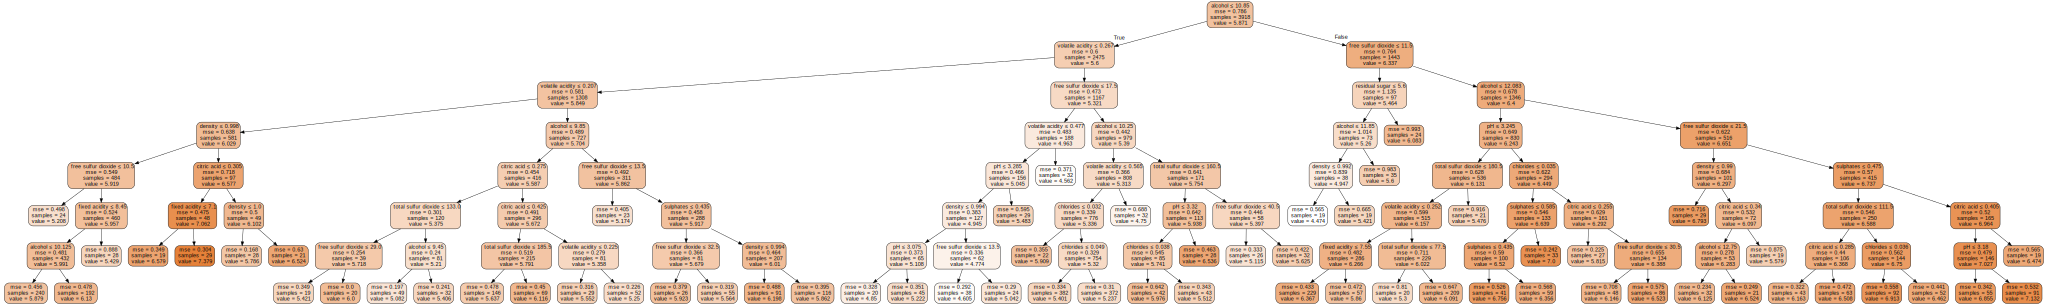

In [645]:
dot_data2 = tree.export_graphviz(best_tree2, out_file = None, 
                                feature_names = X2.columns.values, 
                                filled = True, 
                                rounded = True, special_characters = True)
graph = graphviz.Source(dot_data2)  
graph

###### g) Regresyjne drzewo decyzyjne - próba testowa

In [646]:
prediction_tree2 = best_tree2.predict(X2_test)

In [647]:
results2 = pd.DataFrame({"y_true":y2_test, "y_pred":prediction_tree2})

In [648]:
results2.head()

,y_pred,y_true
4656,6.090909,7
3659,7.131868,8
907,6.913043,8
4352,5.511628,5
3271,6.145833,7


###### h) MSE - próba testowa

In [649]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [650]:
print('RMSE =', mean_squared_error(y_true = results2["y_true"], y_pred = results2["y_pred"]))
print('R^2 =', r2_score(y_true = results2["y_true"], y_pred = results2["y_pred"]))
# Interpretacja:
# Błąd średniokwadratowy wynosi: 0.52 >> Predykcyjny score wina różni się średnio o ok. 0.72 od wartości rzeczywistych
# Współczynnik determinacji R^2 wynosi: 0.33 >> Model wyjaśnił 33% zmienności

RMSE = 0.521005979104776
R^2 = 0.32727688701294044
